In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# Performs PCA and ICA  
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA, FastICA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [3]:
# load arguments
data_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/data/all-pseudomonas-gene-normalized.pcl'
map_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/metadata/mapping_sampleID_medium.txt'
component_num = 2
method = 'ica'

In [4]:
# read in data
data = pd.read_table(data_file, header = 0, sep = '\t', index_col = 0)
data = pd.DataFrame(data)
X = data.transpose()
X.head(5)
X.shape

(1191, 5549)

In [5]:
# PCA
if method == 'pca':
    pca = PCA(n_components=component_num)
    pca_X = pca.fit_transform(X)
# ICA
else:
    pca = FastICA(n_components=component_num)
    pca_X = pca.fit_transform(X)

In [6]:
# Map sample id to clinial phenotype (i.e. experimental condition)

# According to the source, you input will be transformed by np.array() before doing PCA. So you will lose the row index during 
# PCA.fit_transform(X) even you use a structured array or a pandas DataFrame. However, the order of your data is preserved, 
# meaning you can attach the index back if you want
X_ann = pd.DataFrame(pca_X, index=X.index, columns=['PC1', 'PC2'])

# read in mapping file (sample id -- phenotype)
map = pd.read_table(map_file, header = 0, sep = '\t', index_col = 0)

# Join 
X_new = pd.merge(X_ann, map, left_index=True, right_index=True)
X_new.head(10)
X_new.shape

(1129, 3)

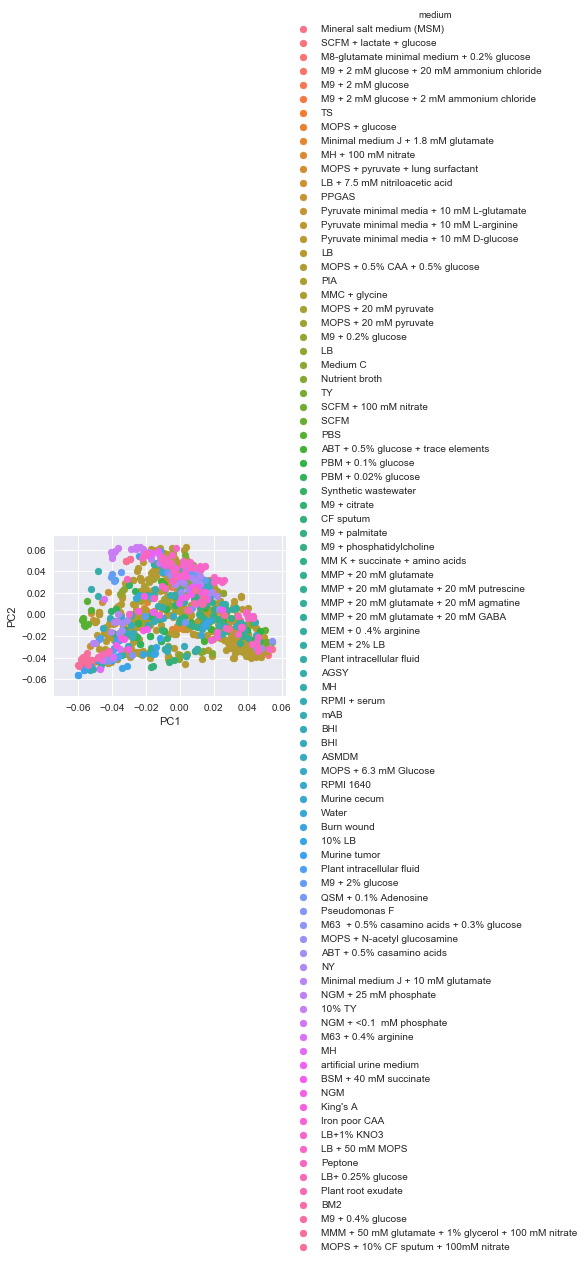

In [9]:
# Plot
fg = sns.FacetGrid(data=X_new, hue='medium', aspect=1.61)
fg.map(plt.scatter, 'PC1', 'PC2')
fg.add_legend()
legend_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/output/'+method+'_legend.png'
#fig_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/output/'+method+'.png'
#fg.savefig(fig_file)
fg.savefig(legend_file)

In [8]:
# Output
file_out = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/output/'+method+'_encoded_features.txt'
X_new.to_csv(file_out, sep='\t')